In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the dataset
df = pd.read_csv('/content/Telcom_Customer_Churn.csv')


In [15]:
# Display the first few rows
df.head()

# Check the data types of columns
df.info()

# Summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
# Check for missing values
print(df.isnull().sum())

# Example strategy: Fill missing 'TotalCharges' with the median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Handle missing values in other columns (if any) based on domain knowledge


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-16-af78b5c5a1cf>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [17]:
# Remove duplicate rows
df = df.drop_duplicates()


In [18]:
# Standardize gender to lower case (if inconsistent)
df['gender'] = df['gender'].str.lower()

# Example: Standardize 'PaymentMethod' values
df['PaymentMethod'] = df['PaymentMethod'].str.strip().str.title()


In [19]:
# Convert 'SeniorCitizen' to categorical type (0 or 1)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

# Convert 'tenure' and 'MonthlyCharges' to numeric type (if they are not already)
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')


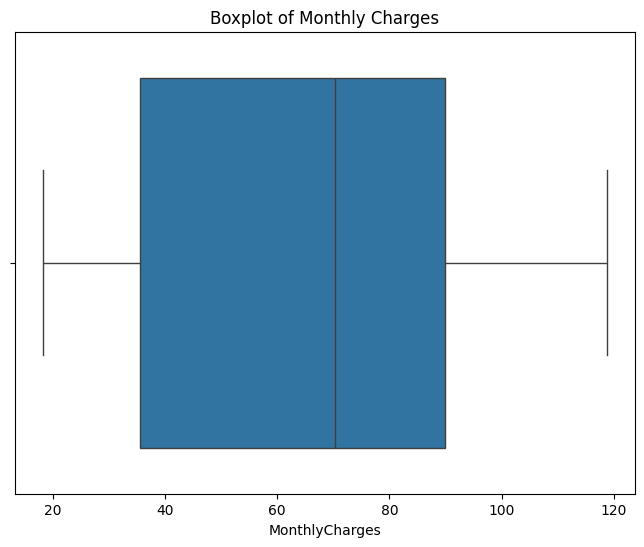

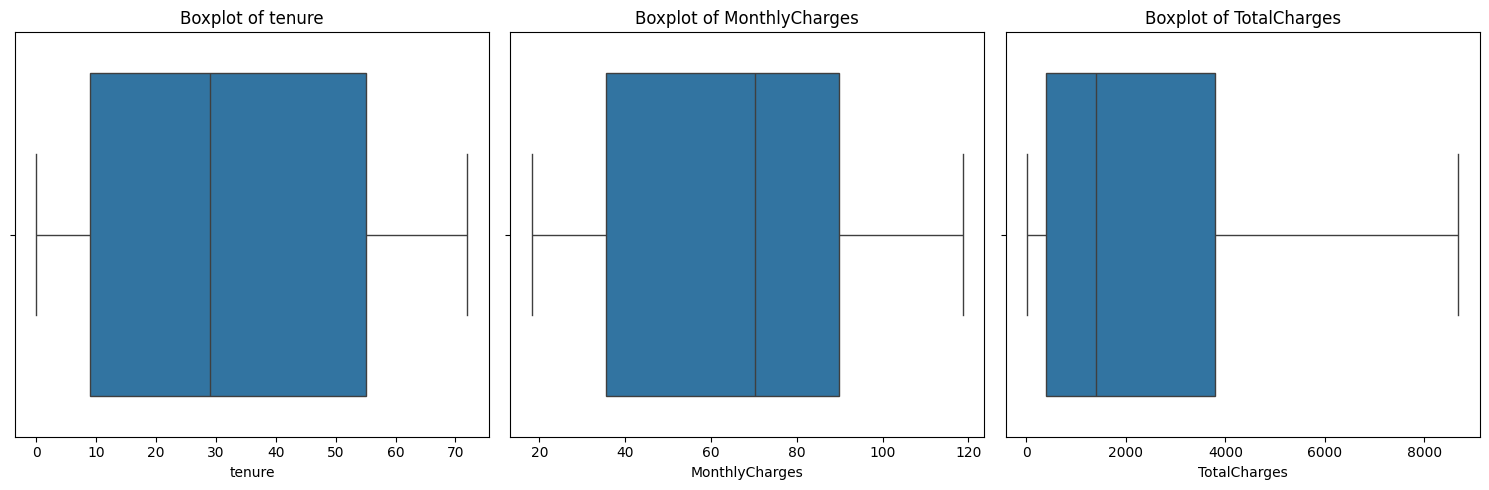

In [20]:
# Example: Boxplot for the 'MonthlyCharges' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

# Boxplot for multiple columns
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [21]:
# Calculate the IQR for 'MonthlyCharges' to detect outliers
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in 'MonthlyCharges'
df = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]


In [22]:
# Example feature engineering: MonthlyCharge per tenure month
df['AverageMonthlyCharge'] = df['MonthlyCharges'] / df['tenure']


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['MonthlyCharges', 'tenure']] = scaler.fit_transform(df[['MonthlyCharges', 'tenure']])


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(columns=['Churn', 'customerID'])  # Features
y = df['Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Export the cleaned dataset
df.to_csv('Cleaned_Telecom_Customer_Churn.csv', index=False)
